In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems.lds import LDSystem
from dynadojo.baselines.lr import LinearRegression
from dynadojo.baselines.dnn import DNN
from dynadojo.baselines.gru_rnn import GRU_RNN
from dynadojo.challenges import FixedDimensionality
import pandas as pd

ModuleNotFoundError: No module named 'dynadojo.baselines.gru_rnn'

In [3]:
challenge = FixedDimensionality(
    N=[10, 50, 100, 500, 1000],
    l=5,
    e=5,
    t=50,
    control_horizons=0,
    max_control_cost_per_dim=0,
    system_cls=LDSystem,
    trials=10,
    test_examples=50,
    test_timesteps=50,
)
data1 = challenge.evaluate(DNN, id="linear regression")
#data2 = challenge.evaluate(DNN, algo_kwargs={"activation": "relu"}, fit_kwargs={"epochs": 20}, id="nonlinear network")
#data3 = challenge.evaluate(DNN, fit_kwargs={"epochs": 20}, id="linear network")
data4 = challenge.evaluate(GRU_RNN, fit_kwargs={"epochs": 20}, id="GRU RNN")

NameError: name 'FixedComplexity' is not defined

In [6]:
data = pd.concat((data1, data4)) #data2, data3))
data.head()

,job_id,trial,latent_dim,embed_dim,timesteps,n,error,ood_error,total_cost,duration,system_seed,algo_seed,id
0,0,1,5,5,50,10,1.841666e-07,None,0,0.000836,3357243988,285987739,linear regression
1,0,1,5,5,50,50,3.295941e-08,None,0,0.000781,3357243988,285987739,linear regression
2,0,1,5,5,50,100,3.899479e-08,None,0,0.001156,3357243988,285987739,linear regression
3,0,1,5,5,50,500,2.751017e-08,None,0,0.003814,3357243988,285987739,linear regression
4,0,1,5,5,50,1000,2.700969e-08,None,0,0.007574,3357243988,285987739,linear regression


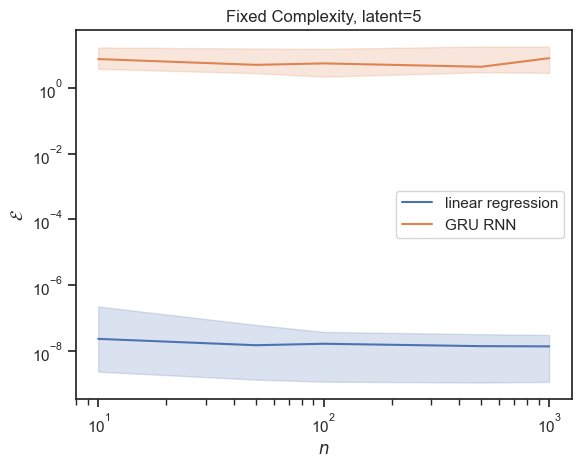

<Axes: title={'center': 'Fixed Complexity, latent=5'}, xlabel='$n$', ylabel='$\\mathcal{E}$'>

In [7]:
challenge.plot(data)